# Credit Card Fraud Detection

In [148]:
import numpy as np
import pandas as pd

## 1. DATA  

- https://www.kaggle.com/datasets/kartik2112/fraud-detection?select=fraudTest.csv

In [149]:
train_raw = pd.read_csv("fraudTrain.csv", index_col=0)

In [150]:
test_raw = pd.read_csv("fraudTest.csv",index_col = 0)

In [151]:
train_raw.shape

(1296675, 22)

In [152]:
test_raw.shape

(555719, 22)

In [153]:
pd.set_option("display.max_columns", len(train_raw.columns))

In [154]:
train_raw.head(3)

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,NC,28654,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,WA,99160,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,ID,83252,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0


### Check Class imbalanced

- The ratio of fraud class (1) is very low

In [155]:
train_raw["is_fraud"].value_counts(normalize=True)

0    0.994211
1    0.005789
Name: is_fraud, dtype: float64

In [156]:
test_raw["is_fraud"].value_counts(normalize=True)

0    0.99614
1    0.00386
Name: is_fraud, dtype: float64

### Dataset Sampling 

- The .sample() gives the ratio of class 0 and class 1 close to original data

In [157]:
#help(test_raw.sample)

In [158]:
train_raw10 = train_raw.sample(frac=0.05, random_state=1)

In [159]:
train_raw10["is_fraud"].value_counts()

0    64483
1      351
Name: is_fraud, dtype: int64

In [160]:
train_raw10["is_fraud"].value_counts(normalize=True)  # normalize = True gives percentage
# train_raw10["is_fraud"].value_counts()/len(train_raw10)

0    0.994586
1    0.005414
Name: is_fraud, dtype: float64

In [161]:
test_raw10 = test_raw.sample(frac=0.1, random_state=1)

In [162]:
test_raw10["is_fraud"].value_counts()

0    55332
1      240
Name: is_fraud, dtype: int64

In [163]:
test_raw10["is_fraud"].value_counts(normalize=True)

0    0.995681
1    0.004319
Name: is_fraud, dtype: float64

## 2. EXPLORATORY DATA ANALYSIS

- Visualize raw data to learn, understand, and hopefully discover patterns in the data

In [164]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
matplotlib.rcParams["font.size"]=14
matplotlib.rcParams["figure.figsize"]= (16,8)
matplotlib.rcParams["figure.facecolor"]="#00000000"

import seaborn as sns
sns.set_style("darkgrid")
import plotly.express as px

In [165]:
df_raw10 = pd.concat([train_raw10,test_raw10]) 

In [166]:
df_raw10.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 120406 entries, 94102 to 302904
Data columns (total 22 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   trans_date_trans_time  120406 non-null  object 
 1   cc_num                 120406 non-null  int64  
 2   merchant               120406 non-null  object 
 3   category               120406 non-null  object 
 4   amt                    120406 non-null  float64
 5   first                  120406 non-null  object 
 6   last                   120406 non-null  object 
 7   gender                 120406 non-null  object 
 8   street                 120406 non-null  object 
 9   city                   120406 non-null  object 
 10  state                  120406 non-null  object 
 11  zip                    120406 non-null  int64  
 12  lat                    120406 non-null  float64
 13  long                   120406 non-null  float64
 14  city_pop               120406 no

In [167]:
df_raw10["is_fraud"].value_counts()

0    119815
1       591
Name: is_fraud, dtype: int64

In [168]:
df_raw10["is_fraud"].value_counts(normalize=True)

0    0.995092
1    0.004908
Name: is_fraud, dtype: float64

### Filters  Group Fraud1 and Fraud0

In [170]:
filt0 = df_raw10['is_fraud'] == 0

In [171]:
filt1 = df_raw10['is_fraud'] == 1

In [172]:
df_raw10_0 = df_raw10.loc[filt0]

In [173]:
df_raw10_1 = df_raw10.loc[filt1]

### Category

In [174]:
df_raw10 = df_raw10.astype({"trans_date_trans_time":"datetime64","cc_num":"object", "dob":"datetime64"})

In [175]:
df_raw10.head(2)

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
94102,2019-02-25 08:24:40,374497717543058,fraud_Funk Group,grocery_net,20.00,Linda,Hurst,F,31701 Tucker Square Suite 893,Wilton,ND,58579,47.1709,-100.7944,1190,"Designer, ceramics/pottery",1948-06-30,1595dec12f6f19ceaae9b7df0f8af5c0,1330158280,46.398331,-99.813959,0
198791,2019-04-12 19:50:15,4428154703770710,"fraud_Prosacco, Kreiger and Kovacek",home,284.88,Brittany,Guerra,F,79209 Gary Dale,Colton,WA,99113,46.5901,-117.1692,761,Chief Marketing Officer,1943-06-30,0ed26b649ed0fce94d8e632b7208dea0,1334260215,45.687331,-117.488135,0


In [176]:
category_df = pd.DataFrame(columns=(["is_fraud1","is_fraud0"]))
category_df["is_fraud1"] = df_raw10.loc[filt1]["category"].value_counts()
category_df["is_fraud0"] = df_raw10.loc[filt0]["category"].value_counts()
category_df["is_fraud_total"] = category_df["is_fraud1"] + category_df["is_fraud0"]
category_df.head(3)

,is_fraud1,is_fraud0,is_fraud_total
shopping_net,142,8987,9129
grocery_pos,123,11353,11476
misc_net,77,5838,5915


Text(0, 0.5, '')

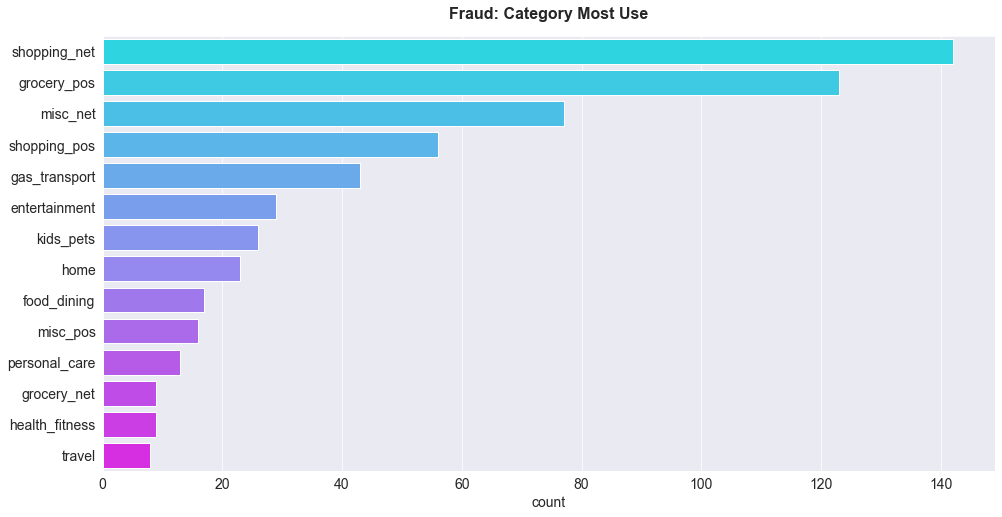

In [177]:
c = sns.barplot(y=category_df.index,
                   x=category_df["is_fraud1"],
                  data=category_df, palette="cool")
                
                
c.set_title("Fraud: Category Most Use",y=1.025, fontdict= {'fontweight':'bold',"fontsize":16})
c.set_xlabel("count", fontsize=14)
c.set_ylabel(None, fontsize=14)

Text(0, 0.5, '')

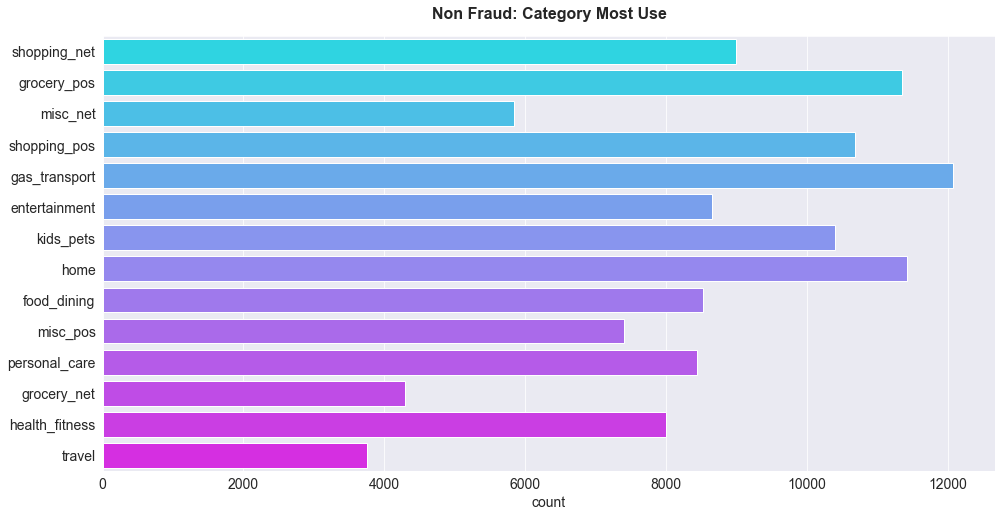

In [178]:
c = sns.barplot(y=category_df.index,
                   x=category_df["is_fraud0"],
                  data=category_df, palette="cool")
                
                
c.set_title("Non Fraud: Category Most Use",y=1.025, fontdict= {'fontweight':'bold',"fontsize":16})
c.set_xlabel("count", fontsize=14)
c.set_ylabel(None, fontsize=14)

### State

In [179]:
states_df = pd.DataFrame(columns=(["is_fraud1","is_fraud0"]))
states_df["is_fraud1"] = df_raw10.loc[filt1]["state"].value_counts()
states_df["is_fraud0"] = df_raw10.loc[filt0]["state"].value_counts()
states_df["is_fraud_total"] = states_df["is_fraud1"] + states_df["is_fraud0"]
#states_df

In [180]:
all_states_list = list(states_df.index)
#all_state_list

In [181]:
fig = px.choropleth(locations=all_states_list, locationmode="USA-states", color=states_df["is_fraud1"], scope="usa",
                   title="Fraud: Across the States")
fig.update_layout(
      title={
        'y':0.92,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top',
        'font_size':20} )
fig.show()

In [182]:
states_df10 = states_df[states_df["is_fraud1"] >=10]
states_df10.head(20)

,is_fraud1,is_fraud0,is_fraud_total
NY,48,7873.0,7921.0
TX,42,8804.0,8846.0
PA,34,7303.0,7337.0
FL,21,3959.0,3980.0
CA,21,5259.0,5280.0
MO,19,3492.0,3511.0
AL,19,3703.0,3722.0
SC,18,2727.0,2745.0
MI,18,4261.0,4279.0
IN,18,2567.0,2585.0


In [183]:
top10_state = list(states_df10.index)
#top10_state

In [184]:
fig = px.choropleth(locations=top10_state, locationmode="USA-states", color=states_df10["is_fraud1"], scope="usa",
                   title="Fraud: Top 10 States")

fig.update_layout(
      title={
        'y':0.92,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top',
        'font_size':20} )


fig.show()

In [185]:
fig = px.histogram(states_df10, x=states_df10.index, y="is_fraud1", title="Staes: Fraud Distribution")
fig.update_layout(bargap=0.01)
fig.show()

In [186]:
fig = px.histogram(states_df10, x=states_df.index, y=states_df["is_fraud1"], title="Staes: Fraud Distribution")
fig.update_layout(bargap=0.01)
fig.show()

### Amount

In [187]:
amount_df = pd.DataFrame(df_raw10.loc[filt1]["amt"])


In [188]:
#box = sns.violinplot( y=amount_df["amt"], data=amount_df)
#box.set_title("Frade: Amount Dollars Used",y=1.025, fontdict= {'fontweight':'bold',"fontsize":16})
#box.set_xlabel(None, fontsize=14)
#box.set_ylabel(None, fontsize=14)

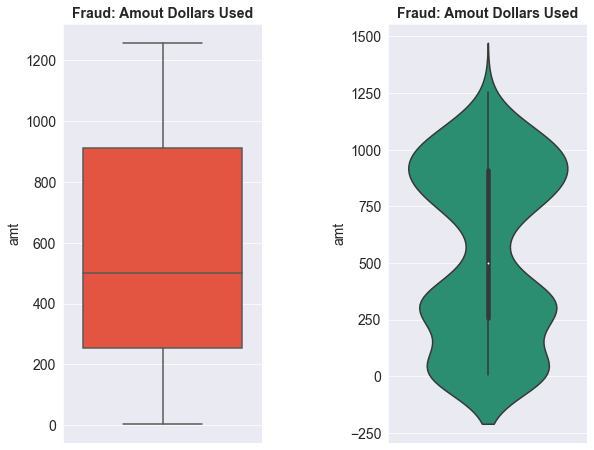

In [189]:
fig, axes = plt.subplots(1,2, figsize=(10,8))

axes[0].set_title("Fraud: Amout Dollars Used",fontdict= {'fontweight':'bold',"fontsize":14})
sns.boxplot(ax=axes[0], data = amount_df,  y=amount_df["amt"],palette="CMRmap")

axes[1].set_title("Fraud: Amout Dollars Used", fontdict= {'fontweight':'bold',"fontsize":14})
sns.violinplot(ax=axes[1], data = amount_df,  y=amount_df["amt"],palette="Dark2")

plt.tight_layout(pad=5)

### Transactions Date

In [190]:
len(df_raw10)

120406

In [191]:
len(df_raw10[filt1])

591

In [192]:
df_raw10 = df_raw10.astype({"trans_date_trans_time":"datetime64"})

In [193]:
amt_trans_df = df_raw10.loc[filt1]
amt_trans_df = amt_trans_df.set_index("trans_date_trans_time")
len(amt_trans_df)

591

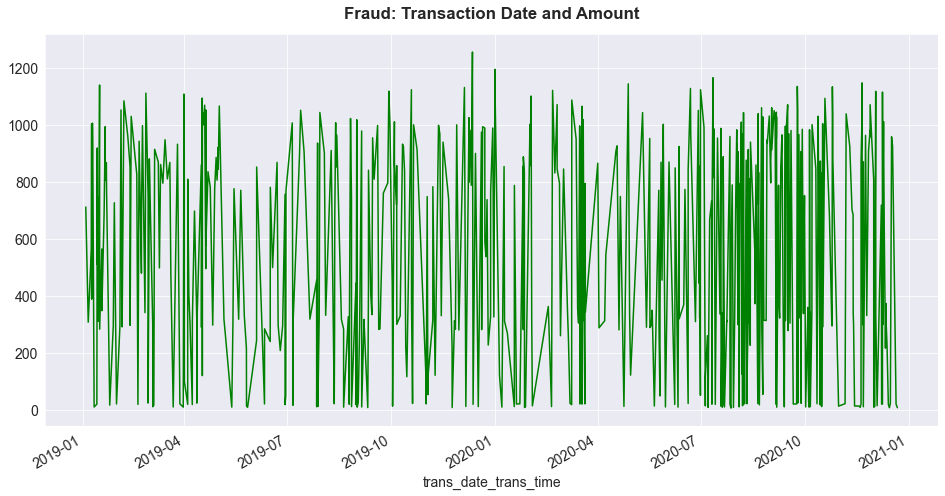

In [194]:
amt_trans_df['amt'].plot(color="green") 
plt.title("Fraud: Transaction Date and Amount", fontweight="bold", y=1.025)#fontname="Times New Roman"
plt.show()

### Merchant

- each merchants transactions count

In [195]:
df_raw10["merchant"].value_counts().head(5)

fraud_Kilback LLC    394
fraud_Cormier LLC    367
fraud_Kuhn LLC       346
fraud_Schumm PLC     341
fraud_Boyer PLC      330
Name: merchant, dtype: int64

- each merchant non-fraud transactions count

In [196]:
df_raw10_0["merchant"].value_counts().head(5)

fraud_Kilback LLC      389
fraud_Cormier LLC      359
fraud_Kuhn LLC         343
fraud_Schumm PLC       338
fraud_Dickinson Ltd    329
Name: merchant, dtype: int64

- each merchants fraud transactions count

In [197]:
df_raw10_1["merchant"].value_counts().head(5)

fraud_Cormier LLC                      8
fraud_Mosciski, Ziemann and Farrell    8
fraud_Medhurst PLC                     6
fraud_Kovacek, Dibbert and Ondricka    6
fraud_Reichert, Shanahan and Hayes     6
Name: merchant, dtype: int64

- Top 20 merchants fraud transactions count

In [198]:
df_raw10_1["merchant"].value_counts().head(20)

fraud_Cormier LLC                      8
fraud_Mosciski, Ziemann and Farrell    8
fraud_Medhurst PLC                     6
fraud_Kovacek, Dibbert and Ondricka    6
fraud_Reichert, Shanahan and Hayes     6
fraud_Rempel Inc                       5
fraud_Kilback LLC                      5
fraud_Schmidt and Sons                 5
fraud_Goldner, Kovacek and Abbott      5
fraud_O'Keefe-Hudson                   5
fraud_Moen, Reinger and Murphy         5
fraud_Koepp-Parker                     5
fraud_Barton Inc                       4
fraud_Streich, Dietrich and Barton     4
fraud_Terry-Huel                       4
fraud_Reichert, Huels and Hoppe        4
fraud_Lebsack and Sons                 4
fraud_Bailey-Morar                     4
fraud_Kunze Inc                        4
fraud_Price Inc                        4
Name: merchant, dtype: int64

In [199]:
merchant_sr = df_raw10_1["merchant"].value_counts()
len(merchant_sr)

314

In [200]:
merchant_top20 = pd.DataFrame(df_raw10_1["merchant"].value_counts().head(20))
merchant_top20

,merchant
fraud_Cormier LLC,8
"fraud_Mosciski, Ziemann and Farrell",8
fraud_Medhurst PLC,6
"fraud_Kovacek, Dibbert and Ondricka",6
"fraud_Reichert, Shanahan and Hayes",6
fraud_Rempel Inc,5
fraud_Kilback LLC,5
fraud_Schmidt and Sons,5
"fraud_Goldner, Kovacek and Abbott",5
fraud_O'Keefe-Hudson,5


In [201]:
merchant_top20.columns

Index(['merchant'], dtype='object')

- Top 20 Merchants Fraud Transactions Occur

Text(0, 0.5, '')

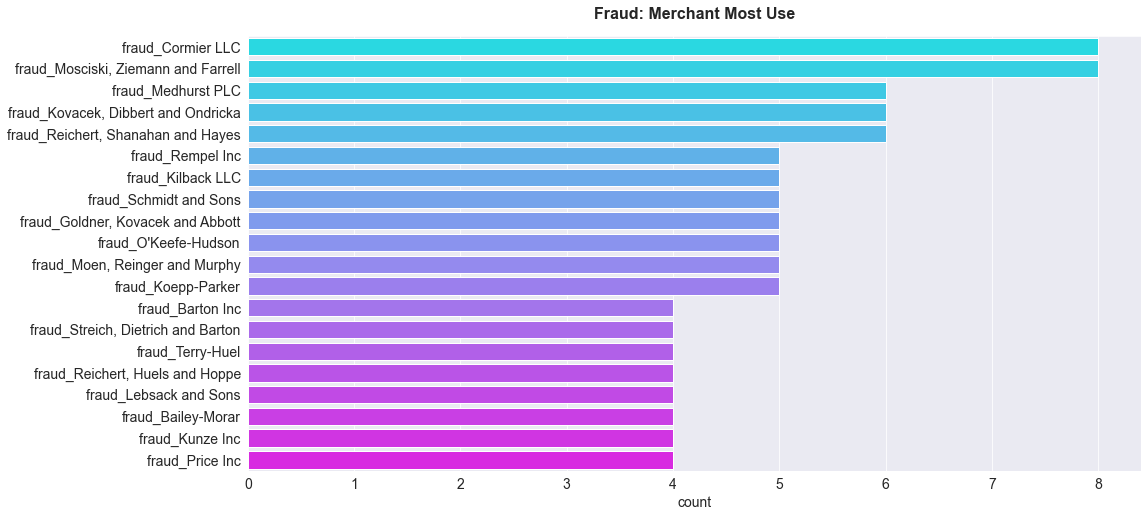

In [202]:
c = sns.barplot(y=merchant_top20.index,
                   x=merchant_top20["merchant"],
                  data=merchant_top20, palette="cool")
                
                
c.set_title("Fraud: Merchant Most Use",y=1.025, fontdict= {'fontweight':'bold',"fontsize":16})
c.set_xlabel("count", fontsize=14)
c.set_ylabel(None, fontsize=14)

### Latitude  Longtitude

**Merchants**

In [203]:
px.scatter(df_raw10.sample(5000, random_state=1), 
           title='Merchants Latitude Longtitude',
           x='merch_lat',
           y='merch_long',
           color='is_fraud')

In [204]:
px.scatter(df_raw10.sample(5000), 
           title='Merchants Latitude Longtitude',
           x='merch_lat',
           y='merch_long',
           color='is_fraud')

**Card Holders**

In [205]:
px.scatter(df_raw10.sample(5000, random_state=1), 
           title='Card Holders Latitude Longtitude',
           x='lat',
           y='long',
           color='is_fraud')

In [206]:
px.scatter(df_raw10.sample(5000), 
           title='Card Holders Latitude Longtitude',
           x='lat',
           y='long',
           color='is_fraud')

### Gender

In [207]:
gender_df = pd.DataFrame(columns=(["is_fraud1","is_fraud0"]))
gender_df["is_fraud1"] = df_raw10.loc[filt1]["gender"].value_counts()
gender_df["is_fraud0"] = df_raw10.loc[filt0]["gender"].value_counts()
gender_df["is_fraud_total"] = gender_df["is_fraud1"] + gender_df["is_fraud0"]
gender_df

,is_fraud1,is_fraud0,is_fraud_total
F,320,65876,66196
M,271,53939,54210


### Age

- Find uniqe ages in fraud transaction

In [208]:
age_df = pd.DataFrame(columns=(["trans_date_trans_time","dob","age","is_fraud"]))
age_df["trans_date_trans_time"]= df_raw10["trans_date_trans_time"]
age_df["dob"] = df_raw10["dob"]
age_df["age"] = df_raw10["trans_date_trans_time"].dt.year - df_raw10["dob"].dt.year
age_df["is_fraud"] = df_raw10["is_fraud"]
age_df.head(3)

,trans_date_trans_time,dob,age,is_fraud
94102,2019-02-25 08:24:40,1948-06-30,71,0
198791,2019-04-12 19:50:15,1943-06-30,76,0
1238587,2020-05-31 21:50:53,1978-11-30,42,0


In [209]:
len(age_df)

120406

In [210]:
age_df["is_fraud"].value_counts()

0    119815
1       591
Name: is_fraud, dtype: int64

In [211]:
age_fraud1 = age_df.loc[filt1]

In [212]:
len(age_fraud1)

591

In [213]:
age_fraud1.head(3)

,trans_date_trans_time,dob,age,is_fraud
209444,2019-04-16 22:21:13,1984-08-31,35,1
1148864,2020-04-24 02:13:27,1966-12-15,54,1
36318,2019-01-22 03:49:33,1986-01-30,33,1


In [214]:
age_fraud1.index.unique() 

Int64Index([ 209444, 1148864,   36318,   59716,  542074,  145785,  208231,
             884569,  588197,  160295,
            ...
              82388,  310093,  145308,  215455,  505085,  328867,  125901,
              85908,  133660,   51809],
           dtype='int64', length=591)

In [215]:
fig = px.histogram(age_fraud1, x="age")
fig.update_layout(bargap=0.01)
fig.show()

## 3. DATA PREPROCESSING

- Without Features Generation
- With Featueres Generation can also be implemented 

In [216]:
df_less_features = df_raw10[:]

In [217]:
df_less_features.head(2)

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
94102,2019-02-25 08:24:40,374497717543058,fraud_Funk Group,grocery_net,20.00,Linda,Hurst,F,31701 Tucker Square Suite 893,Wilton,ND,58579,47.1709,-100.7944,1190,"Designer, ceramics/pottery",1948-06-30,1595dec12f6f19ceaae9b7df0f8af5c0,1330158280,46.398331,-99.813959,0
198791,2019-04-12 19:50:15,4428154703770710,"fraud_Prosacco, Kreiger and Kovacek",home,284.88,Brittany,Guerra,F,79209 Gary Dale,Colton,WA,99113,46.5901,-117.1692,761,Chief Marketing Officer,1943-06-30,0ed26b649ed0fce94d8e632b7208dea0,1334260215,45.687331,-117.488135,0


In [218]:
len(df_less_features)

120406

### Drop Some Columns

- Drop Merchants, and Card holders address because we already have lat, long 
- Drop date, firs, last, gender because not relevant

In [219]:
df_less_features = df_less_features.drop(["trans_date_trans_time","merchant","first", "last", "gender", "street", "city","state","zip",
                                          "job", "dob","trans_num"],axis=1)

In [220]:
df_less_features.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 120406 entries, 94102 to 302904
Data columns (total 10 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   cc_num      120406 non-null  object 
 1   category    120406 non-null  object 
 2   amt         120406 non-null  float64
 3   lat         120406 non-null  float64
 4   long        120406 non-null  float64
 5   city_pop    120406 non-null  int64  
 6   unix_time   120406 non-null  int64  
 7   merch_lat   120406 non-null  float64
 8   merch_long  120406 non-null  float64
 9   is_fraud    120406 non-null  int64  
dtypes: float64(5), int64(3), object(2)
memory usage: 10.1+ MB


### Split Train-Test

In [222]:
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, plot_roc_curve, roc_auc_score, plot_confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, precision_recall_curve, f1_score
from sklearn.metrics import RocCurveDisplay, ConfusionMatrixDisplay
from sklearn import metrics

In [223]:
df_less_features = df_less_features.astype({"is_fraud":"int64"})

In [224]:
train_set, test_set = train_test_split(df_less_features, test_size=0.2, random_state=1)

# X, y = df_less_features.iloc[:, :-1], df_less_features.iloc[:,-1]
# X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=1)

In [225]:
len(train_set)

96324

In [226]:
len(test_set)

24082

In [227]:
X_train = train_set.drop("is_fraud", axis=1)
X_train.head(3)

,cc_num,category,amt,lat,long,city_pop,unix_time,merch_lat,merch_long
348464,30238755902988,personal_care,21.97,30.5920,-97.2893,1766,1339538253,31.140938,-96.416273
37013,6592861994408652,grocery_pos,70.73,42.8112,-78.4481,1166,1372932196,42.998997,-79.227245
266815,30343344410970,grocery_pos,80.80,41.4622,-79.1306,4172,1380337944,41.575942,-79.186297


In [228]:
y_train = train_set['is_fraud'].copy()
#y_train = train_set.iloc[:,-1:]
y_train.head(3)

348464    0
37013     0
266815    0
Name: is_fraud, dtype: int64

In [229]:
X_test = test_set.drop("is_fraud", axis=1)
X_test.head(3)

,cc_num,category,amt,lat,long,city_pop,unix_time,merch_lat,merch_long
902599,3518234918950662,shopping_pos,5.44,33.6372,-96.6184,46563,1356625518,33.059599,-97.243159
333840,180036456789979,gas_transport,73.68,42.9207,-91.0685,878,1339119355,43.713487,-90.454962
920158,5456776410929288,entertainment,5.68,41.0472,-79.8089,139,1356890681,40.053835,-80.009364


In [230]:
y_test = test_set['is_fraud'].copy()
#y_test = test_set.iloc[:,-1:]
y_test.head(3)

902599    0
333840    0
920158    0
Name: is_fraud, dtype: int64

In [231]:
numeric_cols = X_train.select_dtypes(include=np.number).columns.tolist()
categorical_cols = X_train.select_dtypes('object').columns.tolist()

In [232]:
X_train[numeric_cols].describe()

,amt,lat,long,city_pop,unix_time,merch_lat,merch_long
count,96324.000000,96324.000000,96324.000000,9.632400e+04,9.632400e+04,96324.000000,96324.000000
mean,69.816399,38.512349,-90.233931,8.963126e+04,1.363730e+09,38.513164,-90.235320
std,149.813665,5.071460,13.739613,3.055195e+05,1.862573e+07,5.105603,13.751876
min,1.000000,20.027100,-165.672300,2.300000e+01,1.325376e+09,19.039532,-166.670006
25%,9.630000,34.590600,-96.798000,7.410000e+02,1.347461e+09,34.719725,-96.920158
50%,47.280000,39.342600,-87.476900,2.443000e+03,1.368828e+09,39.352440,-87.445020
75%,83.100000,41.846700,-80.175200,1.968500e+04,1.379843e+09,41.925899,-80.249512
max,12882.330000,65.689900,-67.950300,2.906700e+06,1.388534e+09,66.514576,-66.979887


In [233]:
X_train[categorical_cols].nunique()

cc_num      935
category     14
dtype: int64

### Encoding Categorical Columns

- Using **get_dummies or OneHotEncoding** for category > 2 and not orders don't matter
- ex. cat, dog, fish 
- Using **Label Encoding for Ordinal Category**
- ex. poor, average, good, excellent

In [234]:
X_train.head(3)

,cc_num,category,amt,lat,long,city_pop,unix_time,merch_lat,merch_long
348464,30238755902988,personal_care,21.97,30.5920,-97.2893,1766,1339538253,31.140938,-96.416273
37013,6592861994408652,grocery_pos,70.73,42.8112,-78.4481,1166,1372932196,42.998997,-79.227245
266815,30343344410970,grocery_pos,80.80,41.4622,-79.1306,4172,1380337944,41.575942,-79.186297


In [235]:
X_train = pd.concat([X_train, pd.get_dummies(X_train["category"])], axis=1)

In [236]:
len(X_train)

96324

In [237]:
X_test = pd.concat([X_test, pd.get_dummies(X_test["category"])], axis=1)
X_test.head(3)

,cc_num,category,amt,lat,long,city_pop,unix_time,merch_lat,merch_long,entertainment,food_dining,...,grocery_net,grocery_pos,health_fitness,home,kids_pets,misc_net,misc_pos,personal_care,shopping_net,shopping_pos,travel
902599,3518234918950662,shopping_pos,5.44,33.6372,-96.6184,46563,1356625518,33.059599,-97.243159,0,0,...,0,0,0,0,0,0,0,0,0,1,0
333840,180036456789979,gas_transport,73.68,42.9207,-91.0685,878,1339119355,43.713487,-90.454962,0,0,...,0,0,0,0,0,0,0,0,0,0,0
920158,5456776410929288,entertainment,5.68,41.0472,-79.8089,139,1356890681,40.053835,-80.009364,1,0,...,0,0,0,0,0,0,0,0,0,0,0


In [238]:
len(X_test)

24082

### Drop Category (text) columns

In [239]:
X_train.drop(["category"], axis=1, inplace=True)

In [240]:
X_train.head(3)

,cc_num,amt,lat,long,city_pop,unix_time,merch_lat,merch_long,entertainment,food_dining,gas_transport,grocery_net,grocery_pos,health_fitness,home,kids_pets,misc_net,misc_pos,personal_care,shopping_net,shopping_pos,travel
348464,30238755902988,21.97,30.5920,-97.2893,1766,1339538253,31.140938,-96.416273,0,0,0,0,0,0,0,0,0,0,1,0,0,0
37013,6592861994408652,70.73,42.8112,-78.4481,1166,1372932196,42.998997,-79.227245,0,0,0,0,1,0,0,0,0,0,0,0,0,0
266815,30343344410970,80.80,41.4622,-79.1306,4172,1380337944,41.575942,-79.186297,0,0,0,0,1,0,0,0,0,0,0,0,0,0


In [241]:
X_test.drop(["category"], axis=1, inplace=True)

In [242]:
X_test.head(3)

,cc_num,amt,lat,long,city_pop,unix_time,merch_lat,merch_long,entertainment,food_dining,gas_transport,grocery_net,grocery_pos,health_fitness,home,kids_pets,misc_net,misc_pos,personal_care,shopping_net,shopping_pos,travel
902599,3518234918950662,5.44,33.6372,-96.6184,46563,1356625518,33.059599,-97.243159,0,0,0,0,0,0,0,0,0,0,0,0,1,0
333840,180036456789979,73.68,42.9207,-91.0685,878,1339119355,43.713487,-90.454962,0,0,1,0,0,0,0,0,0,0,0,0,0,0
920158,5456776410929288,5.68,41.0472,-79.8089,139,1356890681,40.053835,-80.009364,1,0,0,0,0,0,0,0,0,0,0,0,0,0


### Scale Numeric Columns

In [243]:
scaler = MinMaxScaler()

In [244]:
X_train_sc = scaler.fit_transform(X_train)

In [245]:
#X_train_sc

In [246]:
X_test_sc = scaler.transform(X_test)

## 4. MODELS PREDICTION | EVALUATION

## 4.1 Logistic Regression

### A. Baseline
- Natuaral Accuracy of predicting Non-Fraud = 99.5 % without using any ML, 

In [247]:
df_raw10["is_fraud"].value_counts(normalize=True)  # normalize = True gives percentage

0    0.995092
1    0.004908
Name: is_fraud, dtype: float64

In [248]:
test_set["is_fraud"].value_counts()

0    23950
1      132
Name: is_fraud, dtype: int64

In [249]:
len(X_test)

24082

In [250]:
lg_base = LogisticRegression (random_state=1, class_weight=None)

In [251]:
lg_base.fit(X_train_sc, y_train)

LogisticRegression(random_state=1)

In [252]:
y_pred_base = lg_base.predict(X_test_sc)

- Basically the model just predicts mostly non-fraud

In [253]:
print(f'Accuracy Score: {accuracy_score(y_test,y_pred_base)}')
print(f'Confusion Matrix: \n{confusion_matrix(y_test, y_pred_base)}')
print(f'Area Under Curve: {roc_auc_score(y_test, y_pred_base)}')
print(f'Recall score: {recall_score(y_test,y_pred_base)}')

Accuracy Score: 0.9944356780998256
Confusion Matrix: 
[[23948     2]
 [  132     0]]
Area Under Curve: 0.49995824634655534
Recall score: 0.0


In [545]:
matplotlib.rcParams["figure.figsize"]= (12,8)

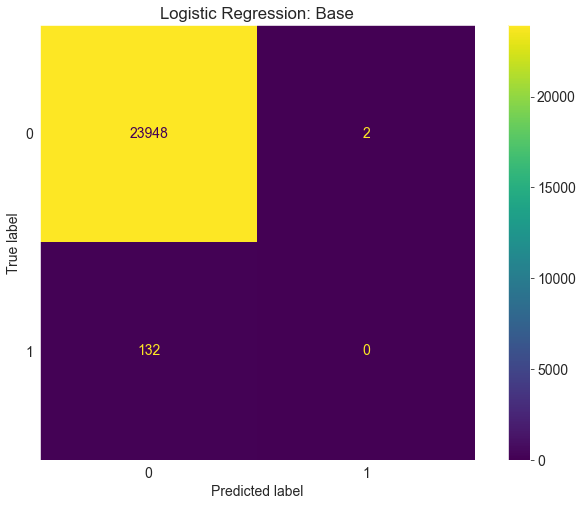

In [546]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_base)
plt.title("Logistic Regression: Base")
plt.grid()

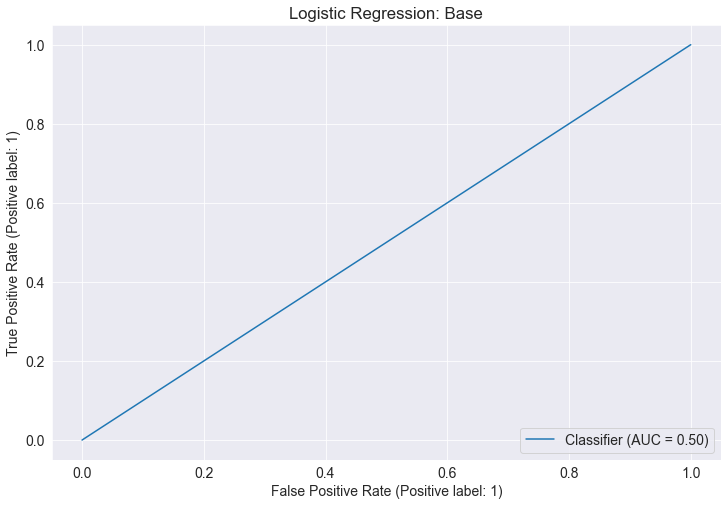

In [547]:
RocCurveDisplay.from_predictions(y_test, y_pred_base)
plt.title("Logistic Regression: Base")
plt.show()

### B. Increase weight minority class

In [258]:
df_raw10["is_fraud"].value_counts(normalize=True)

0    0.995092
1    0.004908
Name: is_fraud, dtype: float64

- Label distribution is 1:99 so we can specify weights as inverse of label distribution. 
- For majority class 0, will use weight of 1 
- For minority class 1, will use weight of 99. 
- The penalty of wrong prediction of minority class would be 99 times more severe than wrong prediction of majority class. 

**Manually Assign Class_weight**

In [259]:
w = {0:1, 1:99}  # define class weights

lg_modified = LogisticRegression(class_weight=w, random_state=1)

In [260]:
lg_modified.fit(X_train_sc, y_train)

/Users/daranee/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



LogisticRegression(class_weight={0: 1, 1: 99}, random_state=1)

In [261]:
y_pred_modified = lg_modified.predict(X_test_sc)

**Increase weight for minority class improve prediction (True-Negative, 1)**

In [262]:
print(f'Accuracy Score: {accuracy_score(y_test,y_pred_modified)}')
print(f'Confusion Matrix: \n{confusion_matrix(y_test, y_pred_modified)}')
print(f'Area Under Curve: {roc_auc_score(y_test, y_pred_modified)}')
print(f'Recall score: {recall_score(y_test,y_pred_modified)}')

Accuracy Score: 0.981313844365086
Confusion Matrix: 
[[23537   413]
 [   37    95]]
Area Under Curve: 0.8512263554121592
Recall score: 0.7196969696969697


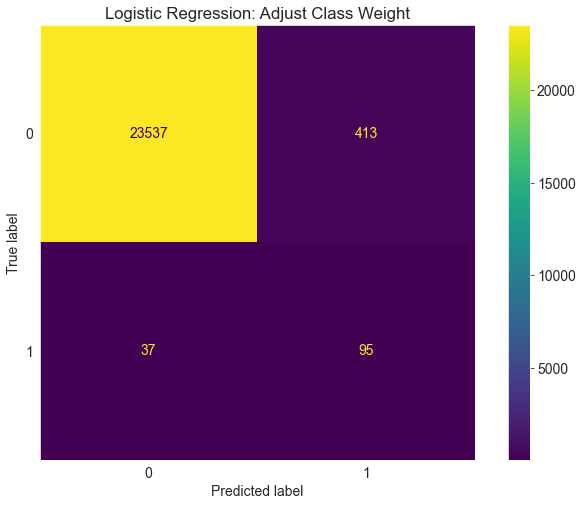

In [548]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_modified)
plt.title("Logistic Regression: Adjust Class Weight")
plt.grid()

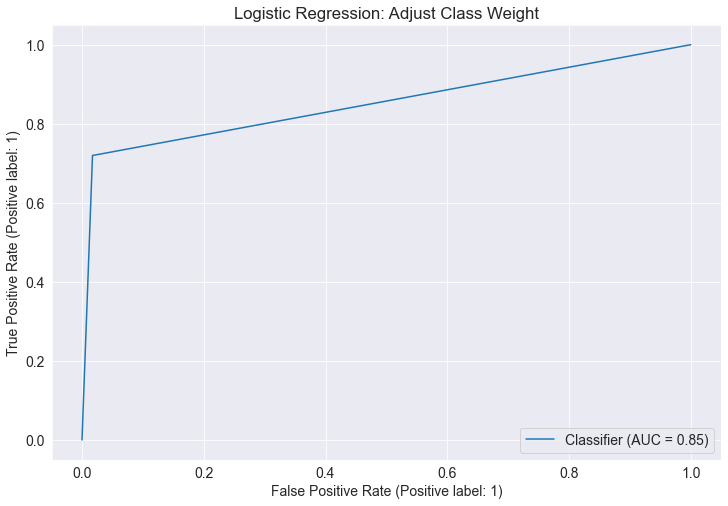

In [549]:
RocCurveDisplay.from_predictions(y_test, y_pred_modified)
plt.title("Logistic Regression: Adjust Class Weight")
plt.show()

**Using Logistic Regression default class_weight = balanced**

In [265]:
lg_modified1 = LogisticRegression(class_weight="balanced", random_state=1)

In [266]:
lg_modified1.fit(X_train_sc, y_train)

LogisticRegression(class_weight='balanced', random_state=1)

In [267]:
y_pred1 = lg_modified1.predict(X_test_sc)

In [268]:
print(f'Accuracy Score: {accuracy_score(y_test,y_pred1)}')
print(f'Confusion Matrix: \n{confusion_matrix(y_test, y_pred1)}')
print(f'Area Under Curve: {roc_auc_score(y_test, y_pred1)}')
print(f'Recall score: {recall_score(y_test,y_pred1)}')

Accuracy Score: 0.9295324308612242
Confusion Matrix: 
[[22287  1663]
 [   34    98]]
Area Under Curve: 0.8364939583728728
Recall score: 0.7424242424242424


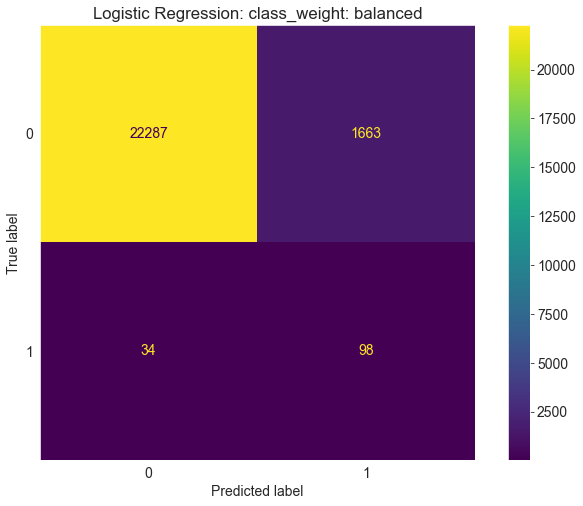

In [550]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred1)
plt.title("Logistic Regression: class_weight: balanced")
plt.grid()

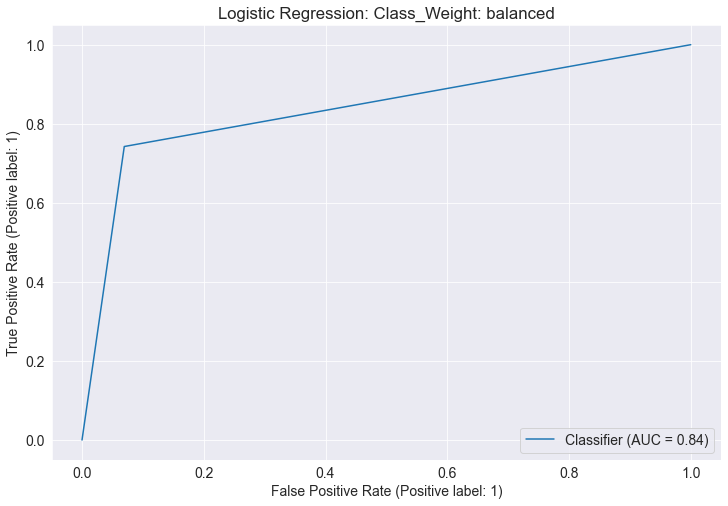

In [551]:
RocCurveDisplay.from_predictions(y_test, y_pred1)
plt.title("Logistic Regression: Class_Weight: balanced")
plt.show()

### C. Increase weight minority class with Grid Search

In [271]:
from sklearn.model_selection import GridSearchCV, cross_val_score

In [294]:
"""
w = [{0:1000,1:100},{0:1000,1:10}, {0:1000,1:1.0}, 
     {0:500,1:1.0}, {0:400,1:1.0}, {0:300,1:1.0}, {0:200,1:1.0}, 
     {0:150,1:1.0}, {0:100,1:1.0}, {0:99,1:1.0}, {0:10,1:1.0}, 
     {0:0.01,1:1.0}, {0:0.01,1:10}, {0:0.01,1:100}, 
     {0:0.001,1:1.0}, {0:0.005,1:1.0}, {0:1.0,1:1.0}, 
     {0:1.0,1:0.1}, {0:10,1:0.1}, {0:100,1:0.1}, 
     {0:10,1:0.01}, {0:1.0,1:0.01}, {0:1.0,1:0.001}, {0:1.0,1:0.005}, 
     {0:1.0,1:10}, {0:1.0,1:99}, {0:1.0,1:100}, {0:1.0,1:150}, 
     {0:1.0,1:200}, {0:1.0,1:300},{0:1.0,1:400},{0:1.0,1:500}, 
     {0:1.0,1:1000}, {0:10,1:1000},{0:100,1:1000} ]

hyperparam_grid = {"class_weight": w }
"""

'\nw = [{0:1000,1:100},{0:1000,1:10}, {0:1000,1:1.0}, \n     {0:500,1:1.0}, {0:400,1:1.0}, {0:300,1:1.0}, {0:200,1:1.0}, \n     {0:150,1:1.0}, {0:100,1:1.0}, {0:99,1:1.0}, {0:10,1:1.0}, \n     {0:0.01,1:1.0}, {0:0.01,1:10}, {0:0.01,1:100}, \n     {0:0.001,1:1.0}, {0:0.005,1:1.0}, {0:1.0,1:1.0}, \n     {0:1.0,1:0.1}, {0:10,1:0.1}, {0:100,1:0.1}, \n     {0:10,1:0.01}, {0:1.0,1:0.01}, {0:1.0,1:0.001}, {0:1.0,1:0.005}, \n     {0:1.0,1:10}, {0:1.0,1:99}, {0:1.0,1:100}, {0:1.0,1:150}, \n     {0:1.0,1:200}, {0:1.0,1:300},{0:1.0,1:400},{0:1.0,1:500}, \n     {0:1.0,1:1000}, {0:10,1:1000},{0:100,1:1000} ]\n\nhyperparam_grid = {"class_weight": w }\n'

In [295]:
lg_modified2 = LogisticRegression(random_state=1)

In [296]:
#grid = GridSearchCV(lg_modified2,hyperparam_grid, scoring="roc_auc", cv=100, n_jobs=-1, refit=True)

In [297]:
#grid.fit(X_train_sc,y_train)

In [298]:
#print(f'Best score: {grid.best_score_} with param: {grid.best_params_}')

In [299]:
#lg_mod2_best_params = grid.best_params_

In [300]:
lg_mod2_best_params = {0: 1.0, 1: 1000}

In [301]:
lg_mod2_best_params

{0: 1.0, 1: 1000}

In [302]:
lg_modified3 = LogisticRegression(random_state=1, class_weight=lg_mod2_best_params)

In [303]:
lg_modified3.fit(X_train_sc,y_train)

/Users/daranee/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



LogisticRegression(class_weight={0: 1.0, 1: 1000}, random_state=1)

In [304]:
y_pred_modified3 = lg_modified3.predict(X_test_sc)

In [305]:
print(f'Accuracy Score: {accuracy_score(y_test,y_pred_modified3)}')
print(f'Confusion Matrix: \n{confusion_matrix(y_test, y_pred_modified3)}')
print(f'Area Under Curve: {roc_auc_score(y_test, y_pred_modified3)}')
print(f'Recall score: {recall_score(y_test,y_pred_modified3)}')

Accuracy Score: 0.42126899759156217
Confusion Matrix: 
[[10016 13934]
 [    3   129]]
Area Under Curve: 0.6977386600873031
Recall score: 0.9772727272727273


- **Increase weight for minority class improve prediction (True-Negative, 1)**
- **True Negative increase to 129** | Catch more fraud
- **False Negative reduces to 3**   | Didn't catch fraud 3
- **But False positive increase too much**  | Predict fraud 13919, but actually they are non-fraud 
- (13,919 customers will get notified fraud sms alert)

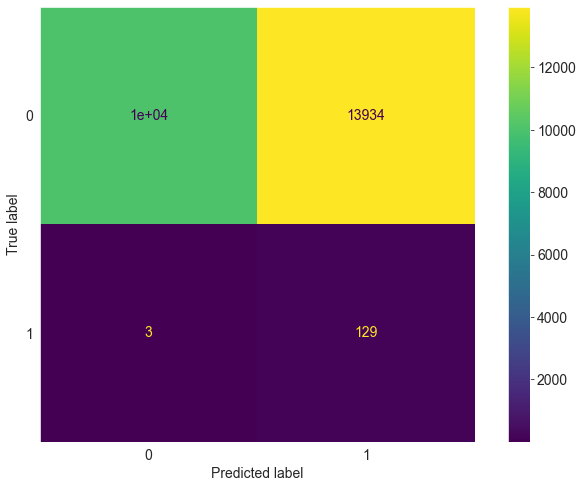

In [552]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_modified3)
plt.grid()

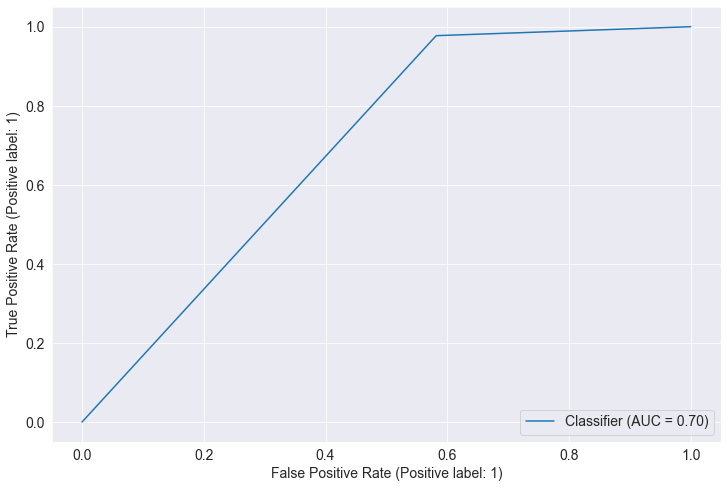

In [553]:
RocCurveDisplay.from_predictions(y_test, y_pred_modified3)
plt.show()

## Trees Based

- Tree Based Boosting weak learner
- No need to scale numeric columns
- Colab has pre installed
- Jupyter needs to install
- Decision Tree tend to overfitting (low bias, high variance)
- XGBoost: CART (Classification and Regression Trees)

- RandomForest vs XGBoost** https://medium.com/geekculture/xgboost-versus-random-forest-898e42870f30

In [308]:
df_less_features = df_raw10[:]

In [309]:
df_less_features = df_less_features.drop(["trans_date_trans_time","merchant","first", "last", "gender", "street", "city","state","zip",
                                          "job", "dob","trans_num"],axis=1)


In [310]:
df_less_features.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 120406 entries, 94102 to 302904
Data columns (total 10 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   cc_num      120406 non-null  object 
 1   category    120406 non-null  object 
 2   amt         120406 non-null  float64
 3   lat         120406 non-null  float64
 4   long        120406 non-null  float64
 5   city_pop    120406 non-null  int64  
 6   unix_time   120406 non-null  int64  
 7   merch_lat   120406 non-null  float64
 8   merch_long  120406 non-null  float64
 9   is_fraud    120406 non-null  int64  
dtypes: float64(5), int64(3), object(2)
memory usage: 10.1+ MB


In [311]:
df_less_features = df_less_features.astype({'cc_num':"int64"})

In [312]:
df_less_features.head(3)

,cc_num,category,amt,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
94102,374497717543058,grocery_net,20.00,47.1709,-100.7944,1190,1330158280,46.398331,-99.813959,0
198791,4428154703770710,home,284.88,46.5901,-117.1692,761,1334260215,45.687331,-117.488135,0
1238587,213148039875802,shopping_net,5.07,27.9551,-82.2966,79613,1370037053,27.254081,-81.974799,0


In [313]:
df_less_features.set_index("cc_num", inplace=True)

In [314]:
df_less_features.head(3)

,category,amt,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
cc_num,,,,,,,,,
374497717543058,grocery_net,20.00,47.1709,-100.7944,1190,1330158280,46.398331,-99.813959,0
4428154703770710,home,284.88,46.5901,-117.1692,761,1334260215,45.687331,-117.488135,0
213148039875802,shopping_net,5.07,27.9551,-82.2966,79613,1370037053,27.254081,-81.974799,0


In [315]:
# train_set, test_set = train_test_split(df_less_features, test_size=0.2, random_state=1)

X, y = df_less_features.iloc[:, :-1], df_less_features.iloc[:,-1]

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=1)

In [316]:
X_train = pd.concat([X_train, pd.get_dummies(X_train["category"])], axis=1)

In [317]:
X_train.drop(["category"], axis=1, inplace=True)

In [318]:
X_train.head(3)

,amt,lat,long,city_pop,unix_time,merch_lat,merch_long,entertainment,food_dining,gas_transport,grocery_net,grocery_pos,health_fitness,home,kids_pets,misc_net,misc_pos,personal_care,shopping_net,shopping_pos,travel
cc_num,,,,,,,,,,,,,,,,,,,,,
30238755902988,21.97,30.5920,-97.2893,1766,1339538253,31.140938,-96.416273,0,0,0,0,0,0,0,0,0,0,1,0,0,0
6592861994408652,70.73,42.8112,-78.4481,1166,1372932196,42.998997,-79.227245,0,0,0,0,1,0,0,0,0,0,0,0,0,0
30343344410970,80.80,41.4622,-79.1306,4172,1380337944,41.575942,-79.186297,0,0,0,0,1,0,0,0,0,0,0,0,0,0


In [319]:
X_train.shape

(96324, 21)

In [320]:
y_train.shape

(96324,)

In [321]:
X_test = pd.concat([X_test, pd.get_dummies(X_test["category"])], axis=1)

In [322]:
X_test.drop(["category"], axis=1, inplace=True)

In [323]:
X_test.head(3)

,amt,lat,long,city_pop,unix_time,merch_lat,merch_long,entertainment,food_dining,gas_transport,grocery_net,grocery_pos,health_fitness,home,kids_pets,misc_net,misc_pos,personal_care,shopping_net,shopping_pos,travel
cc_num,,,,,,,,,,,,,,,,,,,,,
3518234918950662,5.44,33.6372,-96.6184,46563,1356625518,33.059599,-97.243159,0,0,0,0,0,0,0,0,0,0,0,0,1,0
180036456789979,73.68,42.9207,-91.0685,878,1339119355,43.713487,-90.454962,0,0,1,0,0,0,0,0,0,0,0,0,0,0
5456776410929288,5.68,41.0472,-79.8089,139,1356890681,40.053835,-80.009364,1,0,0,0,0,0,0,0,0,0,0,0,0,0


In [324]:
X_test.shape

(24082, 21)

In [325]:
y_test.shape

(24082,)

In [326]:
y_test.value_counts()

0    23950
1      132
Name: is_fraud, dtype: int64

## 4.2 Dicision Tree

In [327]:
from sklearn.tree import DecisionTreeClassifier

- https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html
- The “balanced” mode uses the values of y to automatically adjust weights inversely proportional to class frequencies in the input data as n_samples / (n_classes * np.bincount(y))

In [375]:
dt_clf = DecisionTreeClassifier(max_depth=4, random_state=1)

In [376]:
dt_clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4, random_state=1)

In [377]:
dt_clf_pred = dt_clf.predict(X_test)

In [378]:
print(f'Accuracy Score: {accuracy_score(y_test,dt_clf_pred)}')
print(f'Confusion Matrix: \n{confusion_matrix(y_test, dt_clf_pred)}')
print(f'Area Under Curve: {roc_auc_score(y_test, dt_clf_pred)}')
print(f'Recall score: {recall_score(y_test,dt_clf_pred)}')

Accuracy Score: 0.9969271655178141
Confusion Matrix: 
[[23938    12]
 [   62    70]]
Area Under Curve: 0.764900993230847
Recall score: 0.5303030303030303


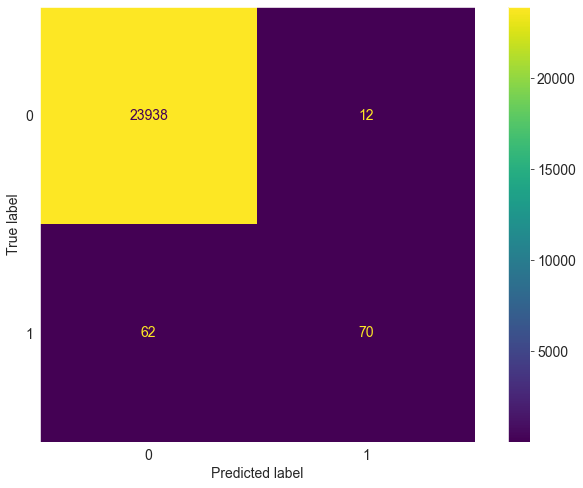

In [554]:
ConfusionMatrixDisplay.from_predictions(y_test, dt_clf_pred)
plt.grid()

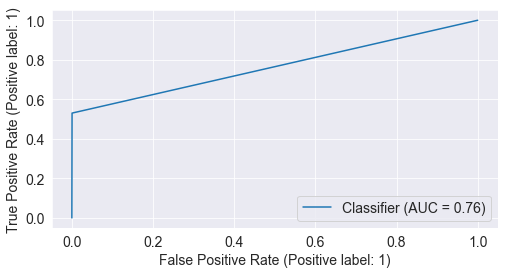

In [380]:
RocCurveDisplay.from_predictions(y_test, dt_clf_pred)
plt.show()

In [369]:
dt_clf2 = DecisionTreeClassifier(max_depth=4, class_weight="balanced", random_state=1)

In [370]:
dt_clf2.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=4, random_state=1)

In [371]:
dt_clf_pred2 = dt_clf2.predict(X_test)

In [372]:
print(f'Accuracy Score: {accuracy_score(y_test,dt_clf_pred2)}')
print(f'Confusion Matrix: \n{confusion_matrix(y_test, dt_clf_pred2)}')
print(f'Area Under Curve: {roc_auc_score(y_test, dt_clf_pred2)}')
print(f'Recall score: {recall_score(y_test,dt_clf_pred2)}')

Accuracy Score: 0.9189436093347728
Confusion Matrix: 
[[22011  1939]
 [   13   119]]
Area Under Curve: 0.9102774087429619
Recall score: 0.9015151515151515


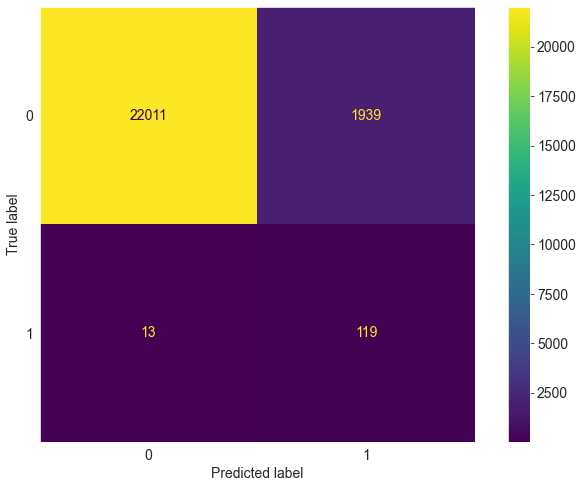

In [555]:
ConfusionMatrixDisplay.from_predictions(y_test, dt_clf_pred2)
plt.grid()

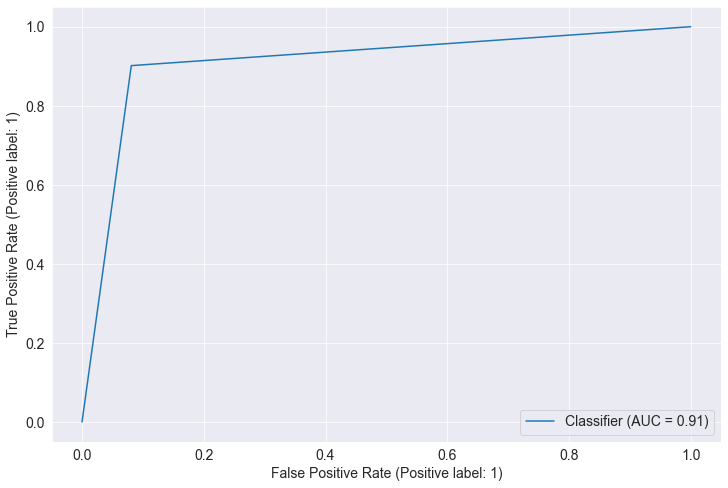

In [556]:
RocCurveDisplay.from_predictions(y_test, dt_clf_pred2)
plt.show()

## 4.3 Random Forest

In [340]:
from sklearn.ensemble import RandomForestClassifier

In [420]:
rf1 = RandomForestClassifier(class_weight='balanced', n_jobs=-1, random_state=1)

In [421]:
rf1.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', n_jobs=-1, random_state=1)

In [422]:
rf1_pred = rf1.predict(X_test)

In [423]:
print(f'Accuracy Score: {accuracy_score(y_test,rf1_pred)}')
print(f'Confusion Matrix: \n{confusion_matrix(y_test, rf1_pred)}')
print(f'Area Under Curve: {roc_auc_score(y_test, rf1_pred)}')
print(f'Recall score: {recall_score(y_test,rf1_pred)}')

Accuracy Score: 0.9968025911469147
Confusion Matrix: 
[[23940    10]
 [   67    65]]
Area Under Curve: 0.7460033529448978
Recall score: 0.49242424242424243


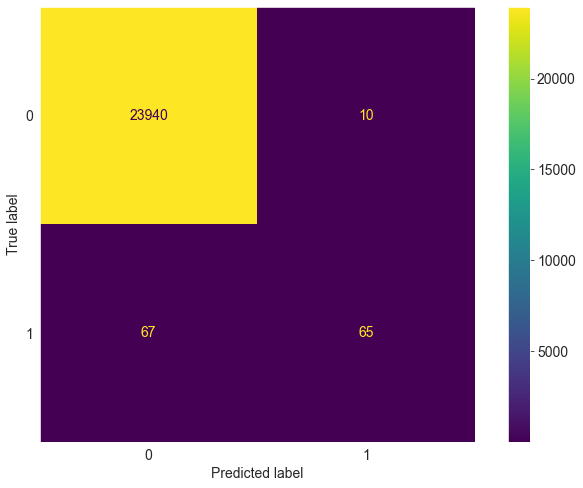

In [557]:
ConfusionMatrixDisplay.from_predictions(y_test, rf1_pred)
plt.grid()

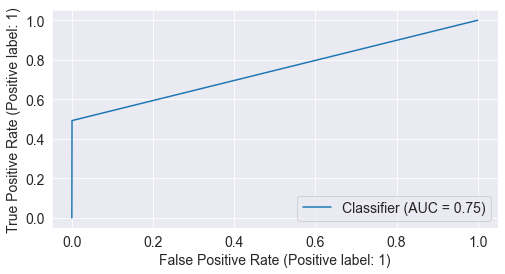

In [425]:
RocCurveDisplay.from_predictions(y_test, rf1_pred)
plt.show()

In [444]:
rf2 = RandomForestClassifier(class_weight='balanced', n_jobs=-1, random_state=1, n_estimators=1000)

In [445]:
rf2.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', n_estimators=1000, n_jobs=-1,
                       random_state=1)

In [446]:
rf2_pred = rf2.predict(X_test)

In [447]:
print(f'Accuracy Score: {accuracy_score(y_test,rf2_pred)}')
print(f'Confusion Matrix: \n{confusion_matrix(y_test, rf2_pred)}')
print(f'Area Under Curve: {roc_auc_score(y_test, rf2_pred)}')
print(f'Recall score: {recall_score(y_test,rf2_pred)}')

Accuracy Score: 0.9970102150984137
Confusion Matrix: 
[[23942     8]
 [   64    68]]
Area Under Curve: 0.7574087429619788
Recall score: 0.5151515151515151


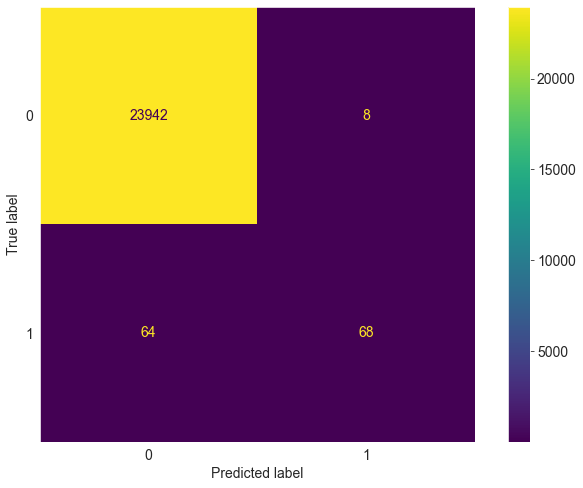

In [558]:
ConfusionMatrixDisplay.from_predictions(y_test, rf2_pred)
plt.grid()

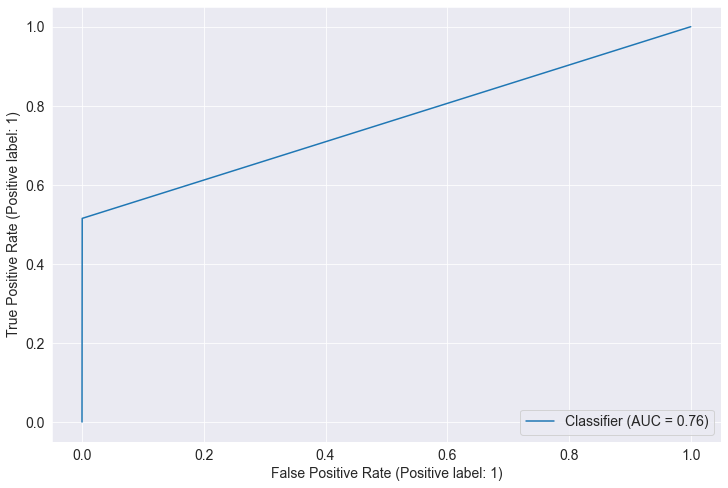

In [559]:
RocCurveDisplay.from_predictions(y_test, rf2_pred)
plt.show()

**GridSearch**

In [402]:
params_rf = {"max_depth":[5,10,15],
             "n_estimators":[10, 50,100, 500, 1000]}

In [404]:
grid_rf = GridSearchCV(estimator=rf2, param_grid = params_rf, cv=3, n_jobs=-1)

In [406]:
grid_rf.fit(X_train, y_train)

GridSearchCV(cv=3,
             estimator=RandomForestClassifier(class_weight='balanced',
                                              n_jobs=-1, random_state=1),
             n_jobs=-1,
             param_grid={'max_depth': [5, 10, 15],
                         'n_estimators': [10, 50, 100, 500, 1000]})

In [407]:
print(f'Best score: {grid_rf.best_score_} with param: {grid_rf.best_params_}')

Best score: 0.9956500975873096 with param: {'max_depth': 15, 'n_estimators': 100}


In [410]:
rf_best_params = grid_rf.best_params_

In [411]:
rf_best_params

{'max_depth': 15, 'n_estimators': 100}

In [413]:
rf3 = RandomForestClassifier(n_jobs=-1, 
                               random_state=1, 
                               n_estimators=100,
                               max_depth=15, 
                               class_weight="balanced")

In [414]:
rf3.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', max_depth=15, n_jobs=-1,
                       random_state=1)

In [416]:
rf3_pred = rf3.predict(X_test)

In [417]:
print(f'Accuracy Score: {accuracy_score(y_test,rf3_pred)}')
print(f'Confusion Matrix: \n{confusion_matrix(y_test, rf3_pred)}')
print(f'Area Under Curve: {roc_auc_score(y_test, rf3_pred)}')
print(f'Recall score: {recall_score(y_test,rf3_pred)}')

Accuracy Score: 0.995847520970019
Confusion Matrix: 
[[23884    66]
 [   34    98]]
Area Under Curve: 0.8698342506484469
Recall score: 0.7424242424242424


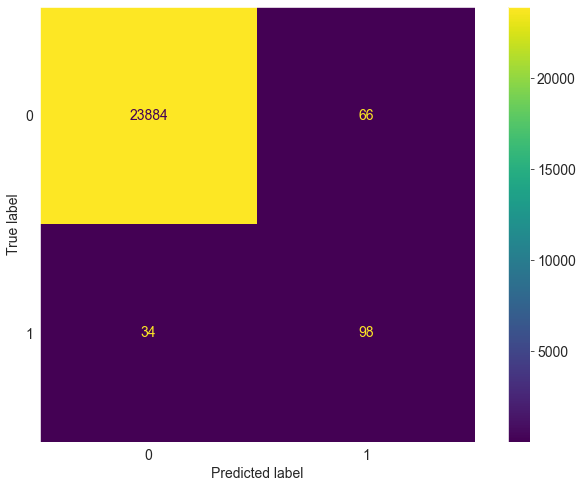

In [560]:
ConfusionMatrixDisplay.from_predictions(y_test, rf3_pred)
plt.grid()

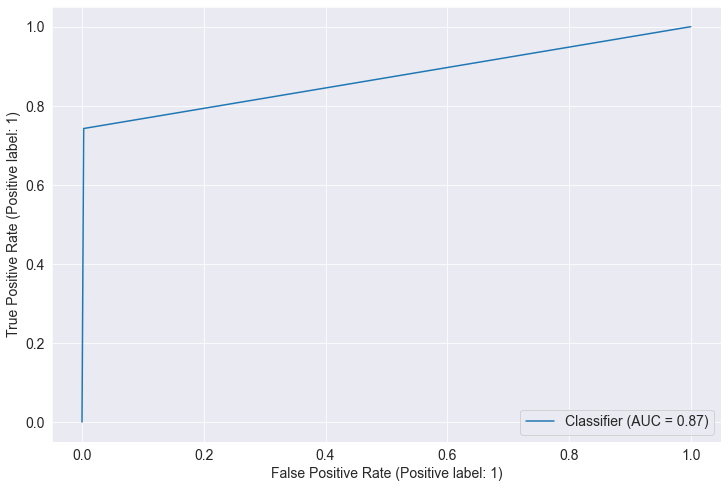

In [561]:
RocCurveDisplay.from_predictions(y_test, rf3_pred)
plt.show()

## 4.4 XGBoost

In [452]:
#!pip install xgboost --quiet

In [453]:
import xgboost as xgb

In [475]:
xgb_cl = xgb.XGBClassifier(objective="binary:logistic", seed=1)

In [476]:
xgb_cl.fit(X_train, y_train)

/Users/daranee/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].

/Users/daranee/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning:

pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.



[15:55:40] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117948562/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, predictor='auto', random_state=1,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=1,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

In [477]:
xgb_cl_pred1 = xgb_cl.predict(X_test)

In [478]:
print(f'Accuracy Score: {accuracy_score(y_test,xgb_cl_pred1)}')
print(f'Confusion Matrix: \n{confusion_matrix(y_test, xgb_cl_pred1)}')
print(f'Area Under Curve: {roc_auc_score(y_test, xgb_cl_pred1)}')
print(f'Recall score: {recall_score(y_test,xgb_cl_pred1)}')

Accuracy Score: 0.9975500373723113
Confusion Matrix: 
[[23941     9]
 [   50    82]]
Area Under Curve: 0.8104181691655596
Recall score: 0.6212121212121212


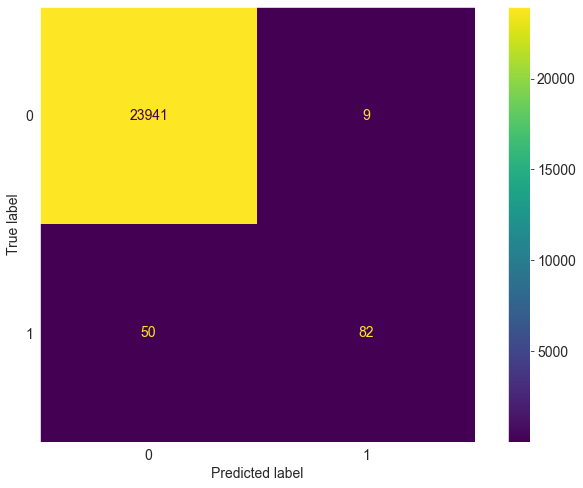

In [562]:
ConfusionMatrixDisplay.from_predictions(y_test, xgb_cl_pred1)
plt.grid()

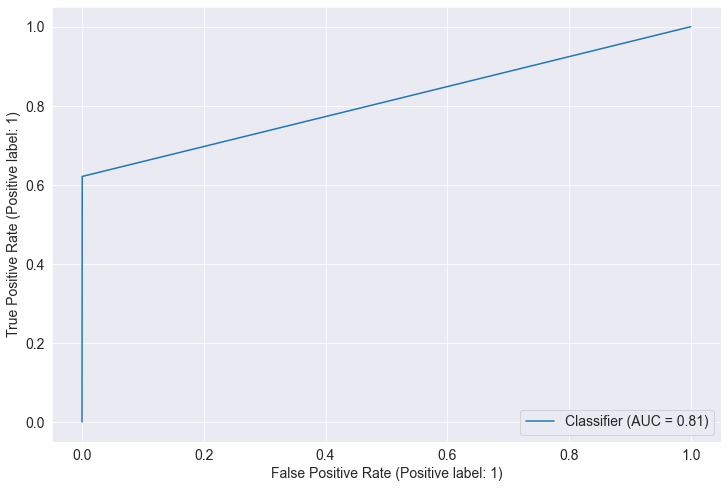

In [563]:
RocCurveDisplay.from_predictions(y_test, xgb_cl_pred1)
plt.show()

### Hyperparameters Tunning

In [481]:
xgb_cl2 = xgb.XGBClassifier(n_jobs=-1, random_state=1, n_estimators=1000, 
                     max_depth=10, subsample=0.9, 
                     colsample_bytree=0.7, objective="binary:logistic", seed=1 )

In [482]:
xgb_cl2.fit(X_train, y_train)

/Users/daranee/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].

/Users/daranee/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning:

pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.



[15:56:01] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117948562/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.7,
              enable_categorical=False, gamma=0, gpu_id=-1,
              importance_type=None, interaction_constraints='',
              learning_rate=0.2, max_delta_step=0, max_depth=10,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=1000, n_jobs=-1, num_parallel_tree=1,
              predictor='auto', random_state=1, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=1, seed=1, subsample=0.9, tree_method='exact',
              validate_parameters=1, verbosity=None)

In [483]:
xgb_cl_pred2 = xgb_cl2.predict(X_test)

In [484]:
print(f'Accuracy Score: {accuracy_score(y_test,xgb_cl_pred2)}')
print(f'Confusion Matrix: \n{confusion_matrix(y_test, xgb_cl_pred2)}')
print(f'Area Under Curve: {roc_auc_score(y_test, xgb_cl_pred2)}')
print(f'Recall score: {recall_score(y_test,xgb_cl_pred2)}')

Accuracy Score: 0.996968690308114
Confusion Matrix: 
[[23933    17]
 [   56    76]]
Area Under Curve: 0.7875238818245082
Recall score: 0.5757575757575758


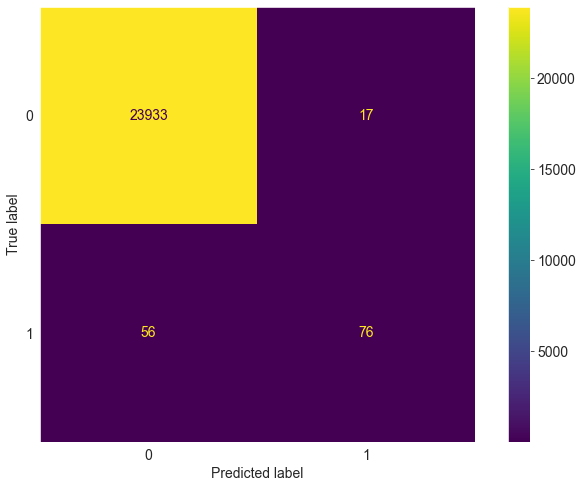

In [564]:
ConfusionMatrixDisplay.from_predictions(y_test, xgb_cl_pred2)
plt.grid()

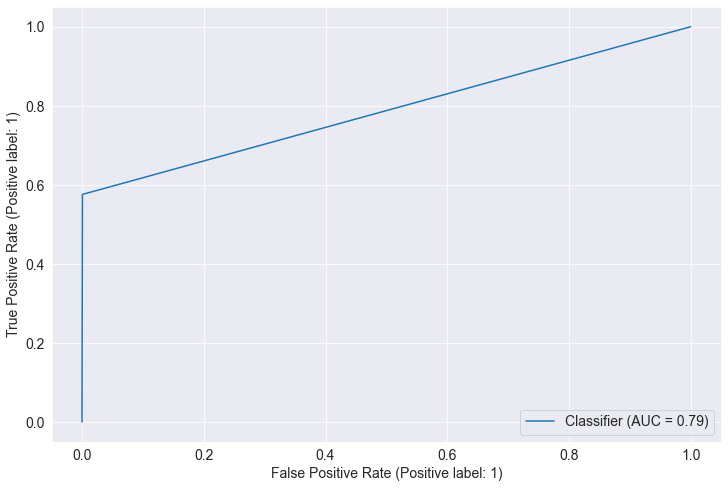

In [565]:
RocCurveDisplay.from_predictions(y_test, xgb_cl_pred2)
plt.show()

**XGBoost GridSearch**

- This will take time to run

In [474]:
"""
params_xgb2 = {"max_depth":[5,10,15],
             "n_estimators":[10,100,500],
              "subsample":[0.25, 0.5,1],
               "alpha":[0.001, 0.01, 0.1]
              }
"""

In [489]:
# grid_xgb2 = GridSearchCV(estimator=xgb_cl, param_grid = params_xgb2, cv=3, n_jobs=-1)

In [491]:
# grid_xgb2.fit(X_train, y_train)

In [492]:
# print(f'Best score: {grid_rf.best_score_} with param: {grid_xgb2.best_params_}')